## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#37ABC4;"> Automobile segmentation by fuel efficiency

### OBJECTIVE-1: To understan K-means clustering by applying on the car dataset to segment the cars into various categories

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Data Understanding & Exploration:

In [4]:
#Importing all the libraries

import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Clustering libraries
from sklearn.cluster import KMeans
from sklearn.svm import SVC

#Metrics libraties
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

# data preparation
from sklearn import preprocessing
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter("ignore")

In [2]:
car = pd.read_csv("Downloads/Car name.csv")
car

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [3]:
car_att = pd.read_json("Downloads/Car-Attributes.json", orient = 'records')
car_att

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [4]:
# Merge both DataFrames together
car_data = car.merge(car_att, left_index=True, right_index=True)
car_data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
car_data.shape

(398, 9)

In [6]:
# 5 point summary of the numerical features
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


Here hp is not displayed while describing. so, it indicates that it contains some unexpected value.

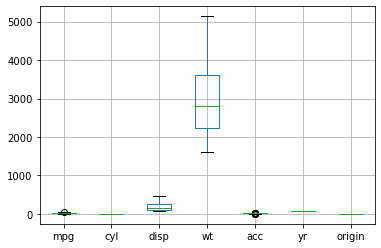

In [7]:
car_data.boxplot();

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Data Preparation & Analysis

In [8]:
# Feature-wise percentage of missing values
null = car_data.isnull().sum()
percent = (car_data.isnull().sum()/car_data.isnull().count()).sort_values()
null_data = pd.concat([null, percent], axis=1, keys=['TotalNullValues', 'PercentOfNullValues'])
print(null_data)

          TotalNullValues  PercentOfNullValues
car_name                0                  0.0
mpg                     0                  0.0
cyl                     0                  0.0
disp                    0                  0.0
hp                      0                  0.0
wt                      0                  0.0
acc                     0                  0.0
yr                      0                  0.0
origin                  0                  0.0


In [9]:
car_data.duplicated().sum()

0

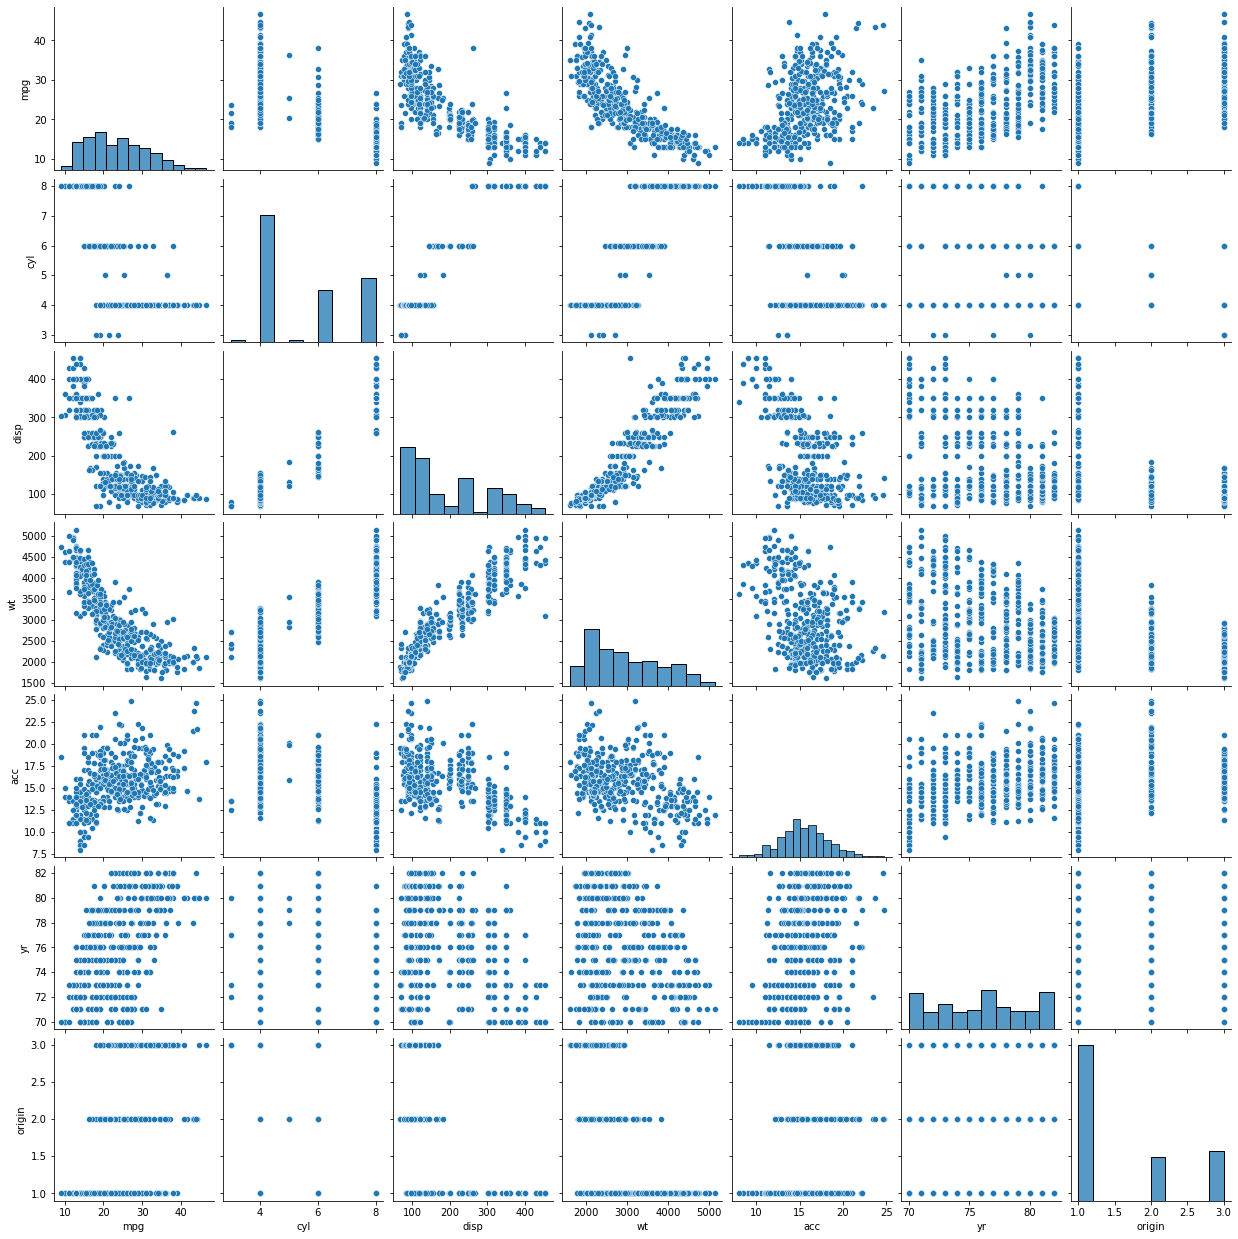

In [10]:
# Pairplot
sns.pairplot(car_data);

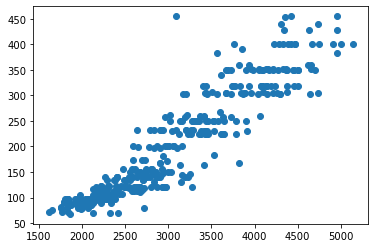

In [11]:
# Visualizing scatterplot which is distinguishable by 'cyl'
plt.scatter(car_data['wt'],car_data['disp']);

Weight and displacement is linearly related to each other. When weight increases displacement also increases accordingly.

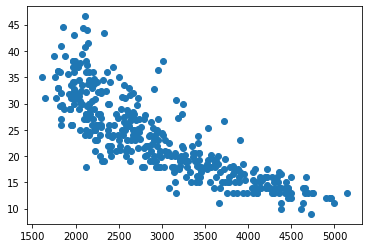

In [12]:
# Visualizing scatterpolot for 'wt' and 'mpg', distinguishable by 'cyl'
plt.scatter(car_data['wt'],car_data['mpg']);

Weight and mpg is also linearly related. But when weight increases, mpg decreases.

In [13]:
# check for unexpected values in all the features
car_data.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [14]:
print("unique values in mpg:\n", car_data['mpg'].unique())
print("\n unique values in cyl:\n", car_data['cyl'].unique())
print("\n unique values in disp:\n", car_data['disp'].unique())
print("\n unique values in hp:\n", car_data['hp'].unique())
print("\n unique values in wt:\n", car_data['wt'].unique())
print("\n unique values in acc:\n", car_data['acc'].unique())
print("\n unique values in yr:\n", car_data['yr'].unique())
print("\n unique values in origin:\n", car_data['origin'].unique())

unique values in mpg:
 [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

 unique values in cyl:
 [8 4 6 3 5]

 unique values in disp:
 [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.  

In [15]:
mode = car_data['hp'].mode()
mode

0    150
dtype: object

In [16]:
car_data = car_data.replace(to_replace='?', value=150)
car_data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [17]:
car_data['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

In [18]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


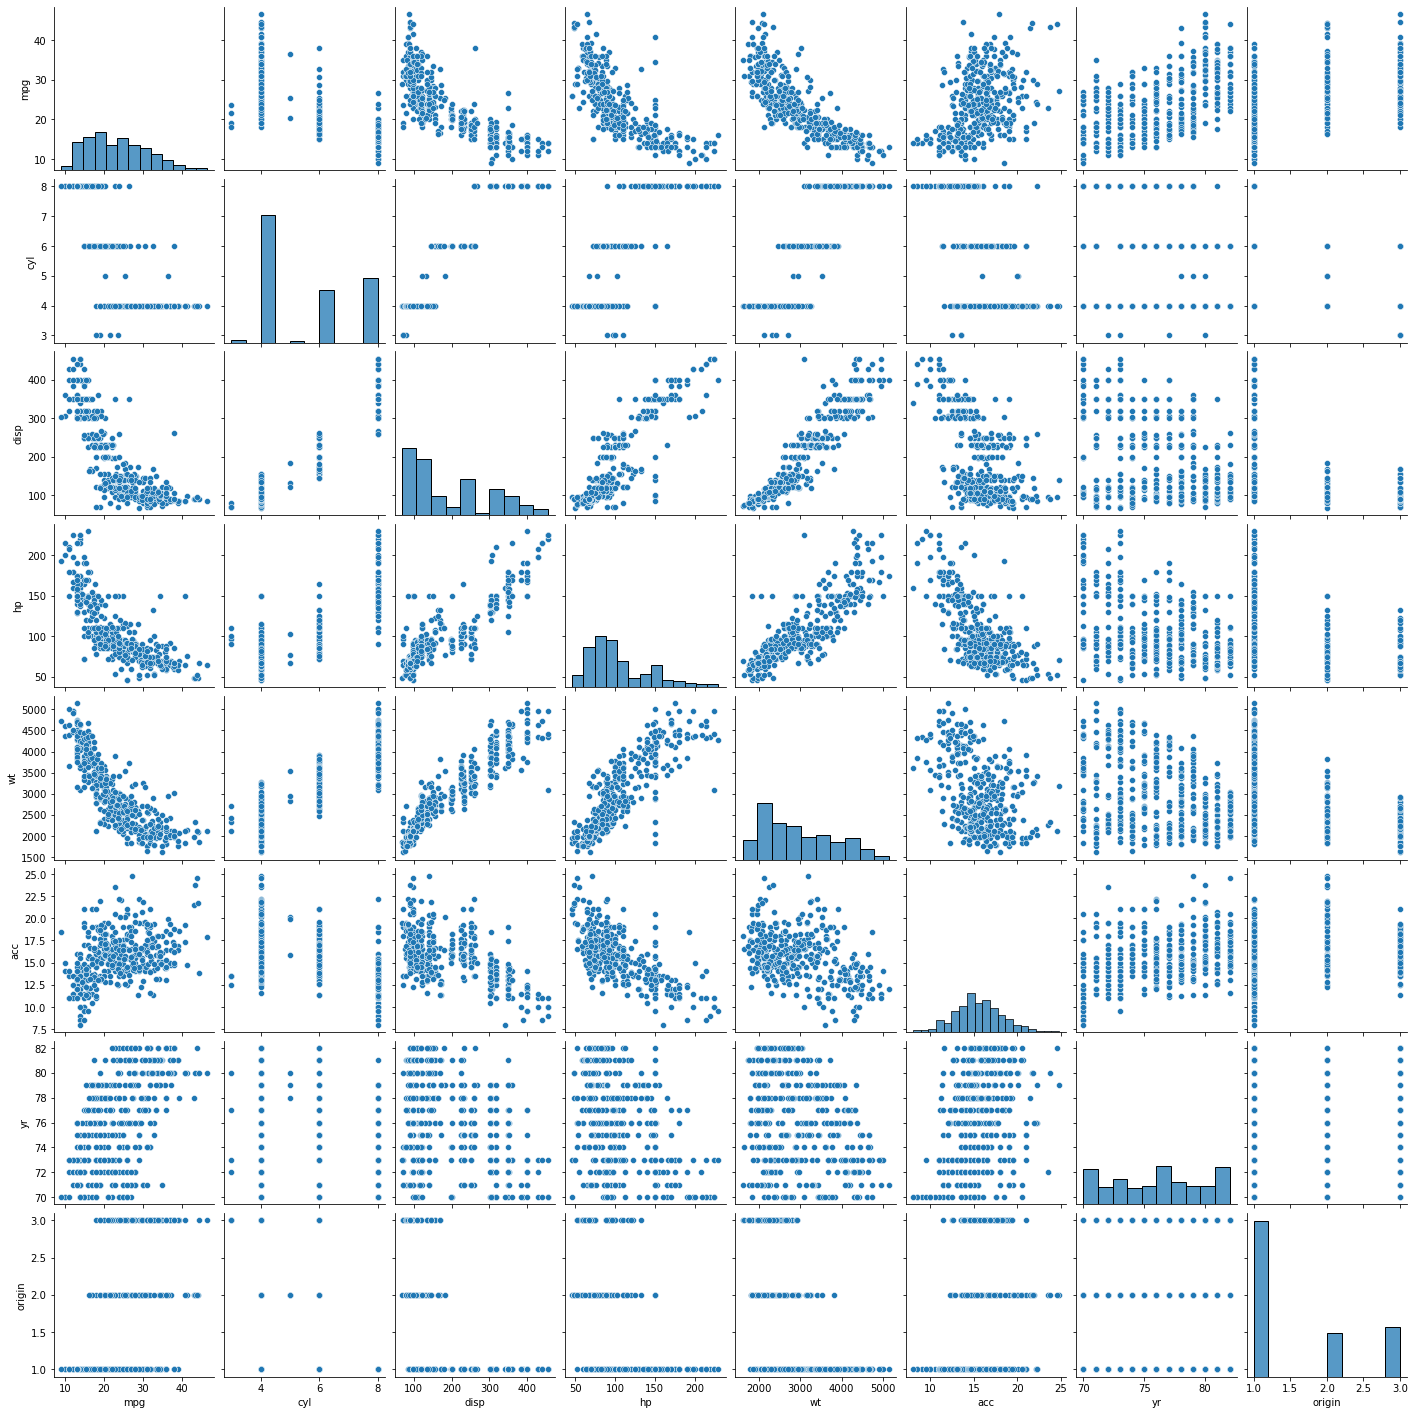

In [19]:
sns.pairplot(car_data);

In [20]:
# K-Means clustering for 2 to 10 clusters
car_data = car_data.drop(['car_name'], axis=1)
car_data

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [21]:
names = car_data.columns
names

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [22]:
# Normalizing the data
norm = preprocessing.normalize(car_data)
car_data_norm = pd.DataFrame(norm, columns=names)
car_data_norm

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0.005113,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.000284
1,0.004039,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.000269
2,0.005210,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.000289
3,0.004637,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.000290
4,0.004905,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.000289
...,...,...,...,...,...,...,...,...
393,0.009656,0.001431,0.050068,0.030756,0.997778,0.005579,0.029325,0.000358
394,0.020609,0.001874,0.045433,0.024356,0.997650,0.011522,0.038407,0.000937
395,0.013900,0.001737,0.058639,0.036487,0.996865,0.005039,0.035618,0.000434
396,0.010645,0.001521,0.045620,0.030033,0.997938,0.007071,0.031174,0.000380


In [24]:
clusters=range(2,11)
wcss_list=[]

for k in clusters:
    model = KMeans(n_clusters=k, random_state= 42)
    model.fit(car_data_norm)
    predict = model.predict(car_data_norm)
    wcss_list.append(model.inertia_)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

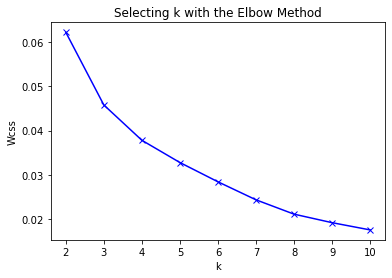

In [25]:
plt.plot(clusters, wcss_list,'bx-')
plt.xlabel('k')
plt.ylabel('Wcss')
plt.title('Selecting k with the Elbow Method')

points 3 and 4 might be the possible elbow point. Among these two, point 3 has more bend. So 3 could be the best k.

In [26]:
# Training a K-means clustering model once again on the optimal number of clusters.
kmeans_model=KMeans(3)
kmeans_model.fit(car_data_norm)
kmeans=kmeans_model.predict(car_data_norm)
kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0,

In [29]:
# Adding a new feature in the DataFrame which will have lables based upon cluster value
car_data["Clusters"] = kmeans
car_data_norm["Clusters"] = kmeans
car_data.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,Clusters
0,18.0,8,307.0,130,3504,12.0,70,1,2
1,15.0,8,350.0,165,3693,11.5,70,1,2
2,18.0,8,318.0,150,3436,11.0,70,1,2
3,16.0,8,304.0,150,3433,12.0,70,1,2
4,17.0,8,302.0,140,3449,10.5,70,1,2
5,15.0,8,429.0,198,4341,10.0,70,1,2
6,14.0,8,454.0,220,4354,9.0,70,1,2
7,14.0,8,440.0,215,4312,8.5,70,1,2
8,14.0,8,455.0,225,4425,10.0,70,1,2
9,15.0,8,390.0,190,3850,8.5,70,1,2


In [30]:
car_data.tail(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,Clusters
388,26.0,4,156.0,92,2585,14.5,82,1,1
389,22.0,6,232.0,112,2835,14.7,82,1,0
390,32.0,4,144.0,96,2665,13.9,82,3,1
391,36.0,4,135.0,84,2370,13.0,82,1,1
392,27.0,4,151.0,90,2950,17.3,82,1,1
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1
397,31.0,4,119.0,82,2720,19.4,82,1,1


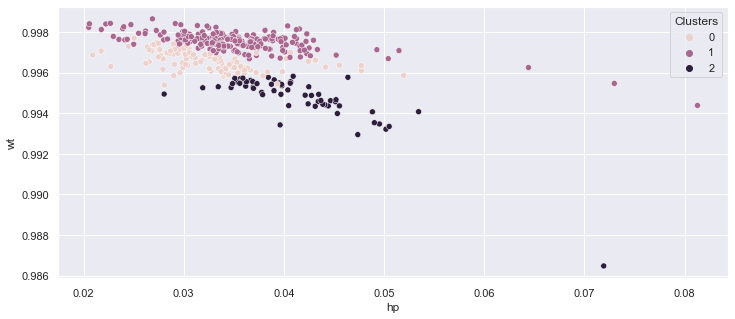

In [32]:
sns.scatterplot(car_data_norm['hp'],car_data_norm['wt'],hue=car_data_norm['Clusters']);

In [35]:
# Passing a new DataPoint and predicting which cluster it belongs to
df = {'mpg': 12, 'cyl': 3,'disp':150,'hp':150,'wt':2100,'acc':16,'yr':72,'origin':2}
df1=car_data.iloc[:,0:-1]
df1

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [36]:
df1=df1.append(df,ignore_index=True)
df1

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1
397,31.0,4,119.0,82,2720,19.4,82,1


In [40]:
kmeans=kmeans_model.predict(df1)

In [41]:
df1.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1
397,31.0,4,119.0,82,2720,19.4,82,1
398,12.0,3,150.0,150,2100,16.0,72,2


In [43]:
df1["Clusters"] = kmeans
df1.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Clusters
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1
397,31.0,4,119.0,82,2720,19.4,82,1,1
398,12.0,3,150.0,150,2100,16.0,72,2,2


Here the newly assigned datapoint belongs to the 3rd cluster.

### OBJECTIVE-2: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;">Data Understanding & Cleaning

In [11]:
vehicle = pd.read_csv("Downloads/vehicle.csv")
vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [12]:
null = vehicle.isnull().sum()
percent = (vehicle.isnull().sum()/vehicle.isnull().count()).sort_values()
null_data = pd.concat([null, percent], axis=1, keys=['TotalNullValues', 'PercentOfNullValues'])
print(null_data)

                             TotalNullValues  PercentOfNullValues
compactness                                0             0.000000
circularity                                5             0.005910
distance_circularity                       4             0.004728
radius_ratio                               6             0.007092
pr.axis_aspect_ratio                       2             0.002364
max.length_aspect_ratio                    0             0.000000
scatter_ratio                              1             0.001182
elongatedness                              1             0.001182
pr.axis_rectangularity                     3             0.003546
max.length_rectangularity                  0             0.000000
scaled_variance                            3             0.003546
scaled_variance.1                          2             0.002364
scaled_radius_of_gyration                  2             0.002364
scaled_radius_of_gyration.1                4             0.004728
skewness_a

In [22]:
vehicle = vehicle.fillna(vehicle.mean())

In [25]:
null = vehicle.isnull().sum()
percent = (vehicle.isnull().sum()/vehicle.isnull().count()).sort_values()
null_data = pd.concat([null, percent], axis=1, keys=['TotalNullValues', 'PercentOfNullValues'])
print(null_data)

                             TotalNullValues  PercentOfNullValues
compactness                                0                  0.0
circularity                                0                  0.0
distance_circularity                       0                  0.0
radius_ratio                               0                  0.0
pr.axis_aspect_ratio                       0                  0.0
max.length_aspect_ratio                    0                  0.0
scatter_ratio                              0                  0.0
elongatedness                              0                  0.0
pr.axis_rectangularity                     0                  0.0
max.length_rectangularity                  0                  0.0
scaled_variance                            0                  0.0
scaled_variance.1                          0                  0.0
scaled_radius_of_gyration                  0                  0.0
scaled_radius_of_gyration.1                0                  0.0
skewness_a

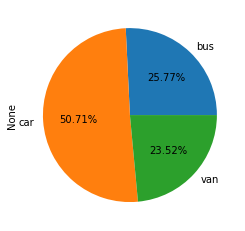

In [26]:
vehicle.groupby('class').size().plot(kind='pie', autopct='%.2f%%');

In [27]:
## converting categorical target value to numerical value
vehicle['class'].replace(['car','bus','van'],[0,1,2],inplace=True)
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1


In [28]:
vehicle.duplicated().sum()

0

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;">Data Preparation

In [30]:
# Split data into X and Y
X = vehicle.drop(columns=['class'])
y = vehicle['class'].values
print("shape of X: ", X.shape)
print("shape of y: ", y.shape)

shape of X:  (846, 18)
shape of y:  (846,)


In [31]:
# Standardize the Data.
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;">Model Building

In [32]:
# Train a base Classification model using SVM.
svm_model = SVC(kernel='linear')
svm_model.fit(X,y)

SVC(kernel='linear')

In [33]:
# Print Classification metrics for train data.
predicted = svm_model.predict(X)
print(classification_report(y,predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       429
           1       0.97      0.98      0.97       218
           2       0.98      0.98      0.98       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



In [36]:
# Apply PCA on the data with 10 components
pca_model = PCA(n_components=10)
pca_model.fit(X)

PCA(n_components=10)

In [37]:
# Visualize Cumulative Variance Explained with Number of Components.
exp_cum_var = pca_model.explained_variance_ratio_
cum_sum = np.cumsum(exp_cum_var)
exp_cum_var

array([9.58527177e-01, 1.81925691e-02, 1.21230440e-02, 3.96523212e-03,
       2.02749416e-03, 1.33577607e-03, 1.18748200e-03, 7.84353303e-04,
       6.42700596e-04, 3.52618443e-04])

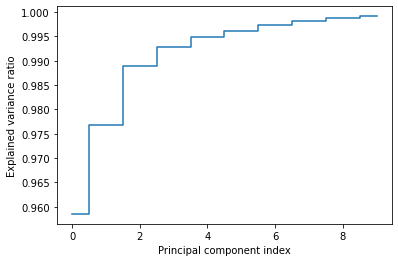

In [38]:
plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

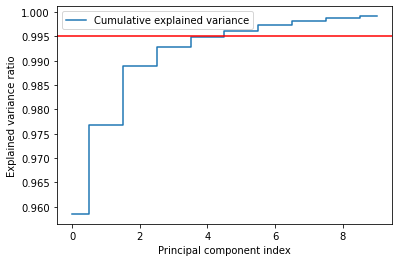

In [39]:
# Draw a horizontal line on the above plot to highlight the threshold of 90%.

plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y = 0.995, color = 'r', linestyle = '-')
plt.show()

In [40]:
# Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.
PCA_model = PCA(n_components=5)
PCA_model.fit(X)

PCA(n_components=5)

In [44]:
explained_cum_var = PCA_model.explained_variance_ratio_
cum_sum_ = np.cumsum(explained_cum_var)
explained_cum_var

array([0.95852718, 0.01819257, 0.01212304, 0.00396523, 0.00202749])

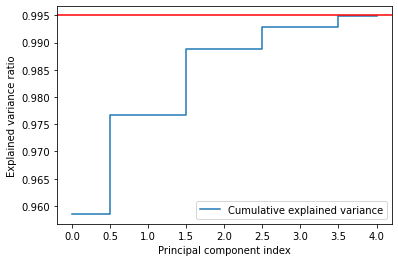

In [45]:
plt.step(range(0,len(cum_sum_)), cum_sum_, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y = 0.995, color = 'r', linestyle = '-')
plt.show()

In [55]:
# Train SVM model on components selected from above step
X_PCA_model = PCA_model.transform(X)
X_PCA_model

array([[-5.69550454e+01,  1.29768455e+01,  2.45125083e+01,
        -9.85704859e+00,  6.82932735e+00],
       [-1.16501451e+02, -9.61088637e+00, -3.75883562e+00,
        -6.41124779e+00,  8.59603233e+00],
       [ 2.11913477e+02,  8.54960332e+00,  1.79700050e+01,
        -3.13722886e+00, -1.67543150e+00],
       ...,
       [ 2.96329451e+02,  1.53693740e+01, -8.20745692e+00,
        -4.27360445e+00, -1.41381492e+01],
       [-1.80913147e+02,  2.74680043e+00, -9.39522927e+00,
        -3.70543339e+00,  1.19556292e+01],
       [-2.47231078e+02, -1.34665324e+01, -1.64017489e+01,
        -2.27716587e-01,  4.20667868e+00]])

In [58]:
svm = SVC(kernel='linear')
svm.fit(X_PCA_model,y)

SVC(kernel='linear')

In [60]:
# Print Classification metrics for train data of above model
predicted2 = svm.predict(X_PCA_model)
print(classification_report(y,predicted2))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       429
           1       0.73      0.67      0.70       218
           2       0.70      0.80      0.75       199

    accuracy                           0.75       846
   macro avg       0.74      0.75      0.74       846
weighted avg       0.75      0.75      0.75       846



The cumulative explained variance ratio is around 99.5% for 5 PCA, performing SVM we have about 75% of accuracy for the data.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Performance Improvement

In [61]:
# Training another SVM on the components out of PCA and tuning the parameters to improve the performance 
model=SVC()
model.fit(X,y)
y_pred = model.predict(X)

In [62]:
y_predict = model.predict(X)
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       429
           1       0.89      0.32      0.47       218
           2       0.61      0.65      0.63       199

    accuracy                           0.66       846
   macro avg       0.71      0.60      0.61       846
weighted avg       0.70      0.66      0.64       846



In [63]:
param = {
    'C' : [0.01,0.05,0.5,1],
    'kernel' :['linear','rbf']
}
grid_svm = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)

In [64]:
grid_svm.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [65]:
# Sharing the best parameters observed
grid_svm.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [66]:
model_svm = SVC(C = 0.01, kernel = 'linear', gamma = 1)
model_svm.fit(X,y)
y_pred_grid = model_svm.predict(X)

In [67]:
new_predict = model_svm.predict(X)
print(classification_report(y,new_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       429
           1       0.93      0.97      0.95       218
           2       0.97      0.98      0.97       199

    accuracy                           0.97       846
   macro avg       0.96      0.97      0.97       846
weighted avg       0.97      0.97      0.97       846



While performing SVM on the components of PCA, the accuracy & precision of the data is at about 66% and 71% accordingly.After hyperparameter tuning and using the optimal paramaters while training the model, the accuracy is about 97%

### ---------------------------------------------------THE END--------------------------------------------------------